In [1]:
# imports the neccessary python modules
import folium
from folium import plugins
from folium.plugins import HeatMap
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

# obtains the machine username for cleaner file paths
user = os.environ["HOME"]

In [2]:
#
bi_case1_data = pd.read_csv(user+"/Documents/CSC7052_Data_Preprocessing/data/BI_Case1_Data.csv")

bi_case1_data.head()

,AirportName,AirportName.1,Month,Count
0,Belfast International Airport,Manchester Airport,January,3080
1,Belfast International Airport,Manchester Airport,February,2361
2,Belfast International Airport,Manchester Airport,March,2981
3,Belfast International Airport,Manchester Airport,April,2318
4,Belfast International Airport,Manchester Airport,May,1987


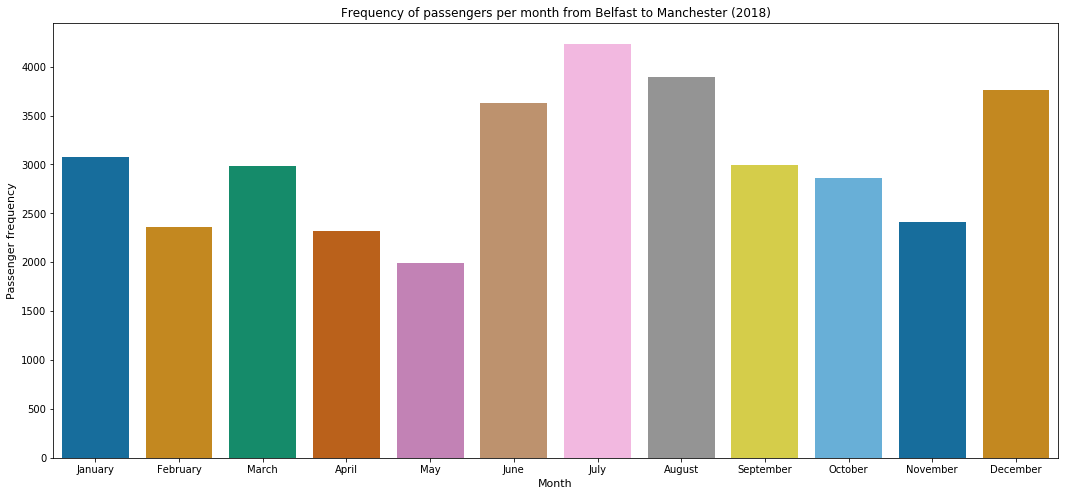

In [3]:
#
passenger_count = bi_case1_data['Count']

#
months = bi_case1_data['Month']

#
frequency_plt = plt.figure(figsize=(18,8))
sns.barplot(months, passenger_count, palette=("colorblind"))
plt.title('Frequency of passengers per month from Belfast to Manchester (2018)')
plt.xlabel('Month', fontsize=11)
plt.ylabel('Passenger frequency', fontsize=11)
plt.show()

In [17]:
#
bi_case2_data = pd.read_csv(user+"/Documents/CSC7052_Data_Preprocessing/data/BI_Case2_Data.csv", encoding='latin-1')


bi_case2_data['Count_Divided'] = bi_case2_data['Destination Count'] * 0.1

bi_case2_data.head()

,Origin Airport,Destination Airport,Latitude,Longitude,Destination Count,Count_Divided
0,Belfast International Airport,Bordeaux-Mí©rignac Airport,44.828300,-0.715556,25000,2500.0
1,Belfast International Airport,Lyon Saint-Exupí©ry Airport,45.725556,5.081111,19826,1982.6
2,Belfast International Airport,Nice-CíÇte d'Azur Airport,43.658401,7.215870,23749,2374.9
3,Belfast International Airport,Charles de Gaulle International Airport,49.012798,2.550000,41292,4129.2
4,Belfast International Airport,Paris-Orly Airport,48.723333,2.379444,13000,1300.0


In [16]:
#filtered = bi_case2_data[(bi_case2_data['Latitude'].between(40, 50, inclusive=True)) & 
#                        (bi_case2_data['Longitude'].between(1, 5, inclusive=True))]

,Origin Airport,Destination Airport,Latitude,Longitude,Destination Count,Count_Divided
3,Belfast International Airport,Charles de Gaulle International Airport,49.012798,2.550000,41292,4129.2
4,Belfast International Airport,Paris-Orly Airport,48.723333,2.379444,13000,1300.0
5,Belfast International Airport,Toulouse-Blagnac Airport,43.629101,1.363820,18721,1872.1
14,Belfast International Airport,Barcelona International Airport,41.297100,2.078460,27816,2781.6


In [18]:
# initialises the folium map
heat_map = folium.Map(location=[51.5074, 0.1278],
                    zoom_start = 6) 

# Ensure you're handing it floats
bi_case2_data['Latitude'] = bi_case2_data['Latitude'].astype(float)
bi_case2_data['Longitude'] = bi_case2_data['Longitude'].astype(float)

#
heat_df = bi_case2_data[['Latitude', 'Longitude']]

# List comprehension to make out list of lists
heat_data = [[row['Latitude'],row['Longitude']] for index, row in heat_df.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(heat_map)

# Display the map
heat_map

In [92]:
#
bi_case3_data = pd.read_csv(user+"/Documents/CSC7052_Data_Preprocessing/data/BI_Case3_Data.csv")

bi_case3_data.head()

,Age Group Type,Age Group Count,Special Assist Count,SpecialAssistDescription
0,Adult (16+),23.0,23.0,I am blind or significantly sight impaired.
1,Adult (16+),65.0,65.0,I am a wheelchair user or I require wheelchair...
2,Adult (16+),13.0,13.0,I am travelling with a registered guide / assi...
3,Adult (16+),341.0,341.0,I am deaf or significantly hearing impaired
4,Adult (16+),687.0,687.0,I have an intellectual or developmental disabi...


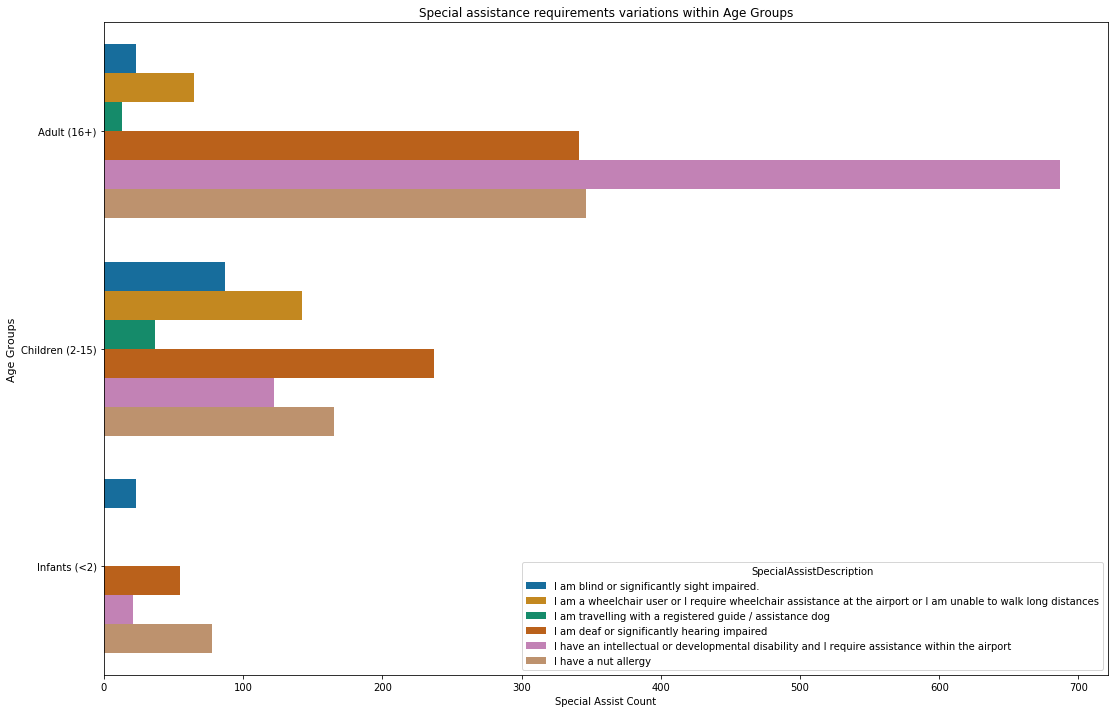

In [122]:
#
specialassist_plt = plt.figure(figsize=(18,12))
sns.barplot(y='Age Group Type', x='Special Assist Count', hue='SpecialAssistDescription', data=bi_case3_data, palette=("colorblind"))
plt.ylabel('Age Groups', fontsize=11)
plt.title('Special assistance requirements variations within Age Groups');

In [ ]:
frequency_plt = plt.figure(figsize=(18,8))
sns.barplot(months, passenger_count, palette=("colorblind"))
plt.title('Frequency of passengers per month from Belfast to Manchester (2018)')
plt.xlabel('Month', fontsize=11)
plt.ylabel('Passenger frequency', fontsize=11)
plt.show()

In [97]:
# reads in the airport data
airports_data = pd.read_csv(user+"/Documents/CSC7052_Data_Preprocessing/data/airports.csv")

airports_data.head(3)

,AirportName,City,Country,AirportCode,Latitude,Longitude
0,Bordeaux-Mérignac Airport,Bordeaux,France,BOD,44.828300,-0.715556
1,Lyon Saint-Exupéry Airport,Lyon,France,LYS,45.725556,5.081111
2,Nice-Côte d'Azur Airport,Nice,France,NCE,43.658401,7.215870


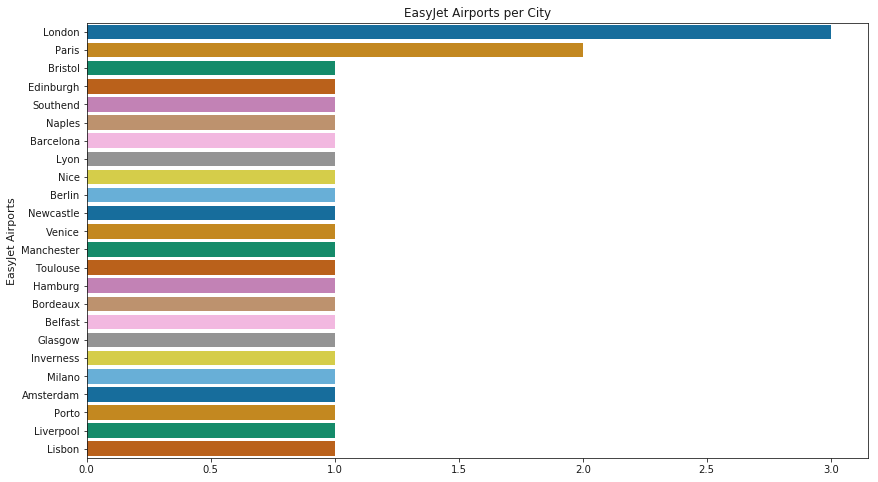

In [93]:
# plots the number of EasyJet Airports per City
city_count = airports_data['City'].value_counts()
#city_count = city_count[:25,]
city_plt = plt.figure(figsize=(14,8))
sns.barplot( city_count.values,city_count.index, palette=("colorblind"))
plt.title('EasyJet Airports per City')
plt.ylabel('EasyJet Airports', fontsize=11)
plt.show()

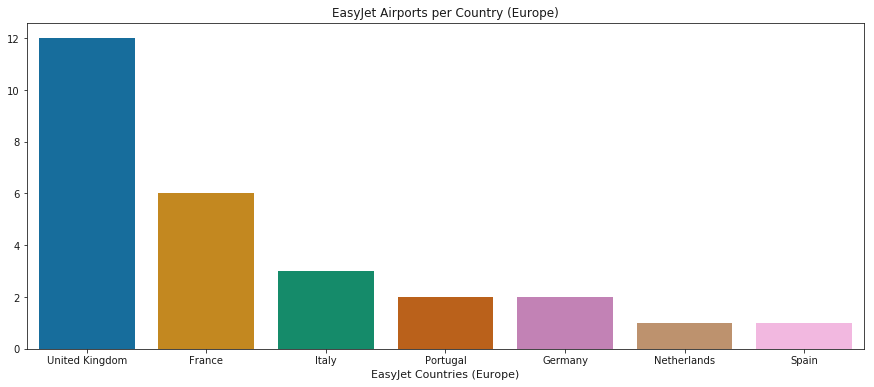

In [94]:
# plots the number of EasyJet Airports per European Country
country_count = airports_data['Country'].value_counts()

country_plt = plt.figure(figsize=(15,6))
sns.barplot(country_count.index, country_count.values, palette=("colorblind"))
plt.title('EasyJet Airports per Country (Europe)')
plt.xlabel('EasyJet Countries (Europe)', fontsize=11)
plt.show()